# OPTIMIZING MCX GATES - PREPARING FOR FUTURE HARDWARE TODAY

This note describes how to use the Classiq platform to create MCX gates, including one with 14 controls. Then, it demonstrates a much more complex example with 50 control qubits.

## QUANTUM RESOURCES ARE VALUABLE, YET LIMITED

Quantum computers offer tantalizing promises to those who can harness their power. And though today’s computers are not quite able to solve real-world problems, those who are able to optimize for the hardware available will be able to reap rewards sooner than those who wait. The MCX gate is an important quantum gate used in a variety of circuits, such as the Grover Operator, logical AND operator, various state preparation algorithms, and arithmetic comparators. The ability to adapt implementations of MCX gates to meet the hardware constraints - limited qubit count, fidelities, gate count, and so on - is not trivial.

## 1. HOW TO CREATE A 14-CONTROL MCX GATE WITH CLASSIQ

To create an MCX gate with 14 control qubits using Classiq, we will first define a quantum function called `my_mcx`, whose arguments are an array of qubits (of any size) to be used as `control`, and a single qubit argument to be used as the `target`. 

In [1]:
from math import pi

from classiq import (
    Constraints,
    CustomHardwareSettings,
    OptimizationParameter,
    Output,
    Preferences,
    QArray,
    QBit,
    QuantumProgram,
    X,
    allocate,
    control,
    create_model,
    qfunc,
    set_constraints,
    set_preferences,
    show,
    synthesize,
)

In [2]:
@qfunc
def my_mcx(cntrl: QArray[QBit], target: QBit) -> None:
    control(cntrl, lambda: X(target))

Then, to create an MCX gate with 14 control qubits we will create a quantum `main` function that will simply execute our `my_mcx` function with 14 qubits allocated to the `control` argument.   

In [3]:
@qfunc
def main(cntrl: Output[QArray[QBit]], target: Output[QBit]) -> None:
    allocate(14, cntrl)
    allocate(1, target)
    my_mcx(cntrl, target)

To build our model we will use the `create_model` function: 

In [4]:
model = create_model(main)

To constrain a circuit to only 20 qubits and optimize for circuit depth, we pass the max width and optimization parameter to a `Constraints` object and update our model

In [5]:
from classiq import write_qmod

constraints = Constraints(
    max_width=20, optimization_parameter=OptimizationParameter.DEPTH
)
model = set_constraints(model, constraints)

write_qmod(model, "mcx_14_ctrl_depth")

We can now synthesize our model, create a quantum program and view it: 

In [6]:
qprog = synthesize(model)
show(qprog)

Opening: https://platform.classiq.io/circuit/f02def22-6d41-4874-b5d3-7dd2720bd13d?version=0.41.0.dev39%2B79c8fd0855


Additionally, To get the transpiled circuit from our `qprog` object and print its depth: 

In [7]:
circuit = QuantumProgram.from_qprog(qprog)
print(f"Synthesized MCX depth is {circuit.transpiled_circuit.depth}")

Synthesized MCX depth is 94


## 2. AN MCX FOR EVERY OCCASION

Classiq automatically optimizes the quantum circuit and each MCX gate to a plethora of possible situations. To characterize each setting we pass our constraints and preferences to the synthesis request using the `Constraints` and `Preferences` objects.

### 2.1 OPTIMIZING FOR DIFFERENT HARDWARE

In [8]:
model = create_model(main)
constraints = Constraints(
    optimization_parameter=OptimizationParameter.DEPTH, max_width=21
)
preferences = Preferences(
    backend_service_provider="IBM Quantum", backend_name="ibmq_kolkata"
)
model = set_constraints(model, constraints)
model = set_preferences(model, preferences)

write_qmod(model, "mcx_14_ctrl_hardware")


qprog = synthesize(model)
circuit = QuantumProgram.from_qprog(qprog)

print(f"Synthesized MCX depth is {circuit.transpiled_circuit.depth}")
circuit.show()

Synthesized MCX depth is 101
Opening: https://platform.classiq.io/circuit/e45b46e1-1fd7-411f-88ba-615a3e6b4585?version=0.41.0.dev39%2B79c8fd0855


### 2.2 OPTIMIZING FOR CX GATES

In [9]:
model = create_model(main)
constraints = Constraints(max_width=19, optimization_parameter="cx")
preferences = Preferences(
    custom_hardware_settings=CustomHardwareSettings(basis_gates=["cx", "u"])
)
model = set_constraints(model, constraints)
model = set_preferences(model, preferences)

write_qmod(model, "mcx_14_ctrl_cx")


qprog = synthesize(model)
circuit = QuantumProgram.from_qprog(qprog)

print(f"Synthesized MCX cx-count is {circuit.transpiled_circuit.count_ops['cx']}")
circuit.show()

Synthesized MCX cx-count is 168
Opening: https://platform.classiq.io/circuit/c49dfb32-08c7-4d2f-a75b-f0dc9e1a5554?version=0.41.0.dev39%2B79c8fd0855


## 3. BEYOND 14 CONTROLS

The power of the Classiq synthesis engine is far greater than creating optimized, 14-control MCX gates in an instant. Take the following code, where we create an MCX gate with 50 control qubits.

In [10]:
@qfunc
def main(cntrl: Output[QArray[QBit]], target: Output[QBit]) -> None:
    allocate(50, cntrl)
    allocate(1, target)
    my_mcx(cntrl, target)


model = create_model(main)

write_qmod(model, "mcx_50_ctrl")

qprog = synthesize(model)
show(qprog)

Opening: https://platform.classiq.io/circuit/6b3e2677-dd1d-4397-b40f-b6f15a2b61de?version=0.41.0.dev39%2B79c8fd0855


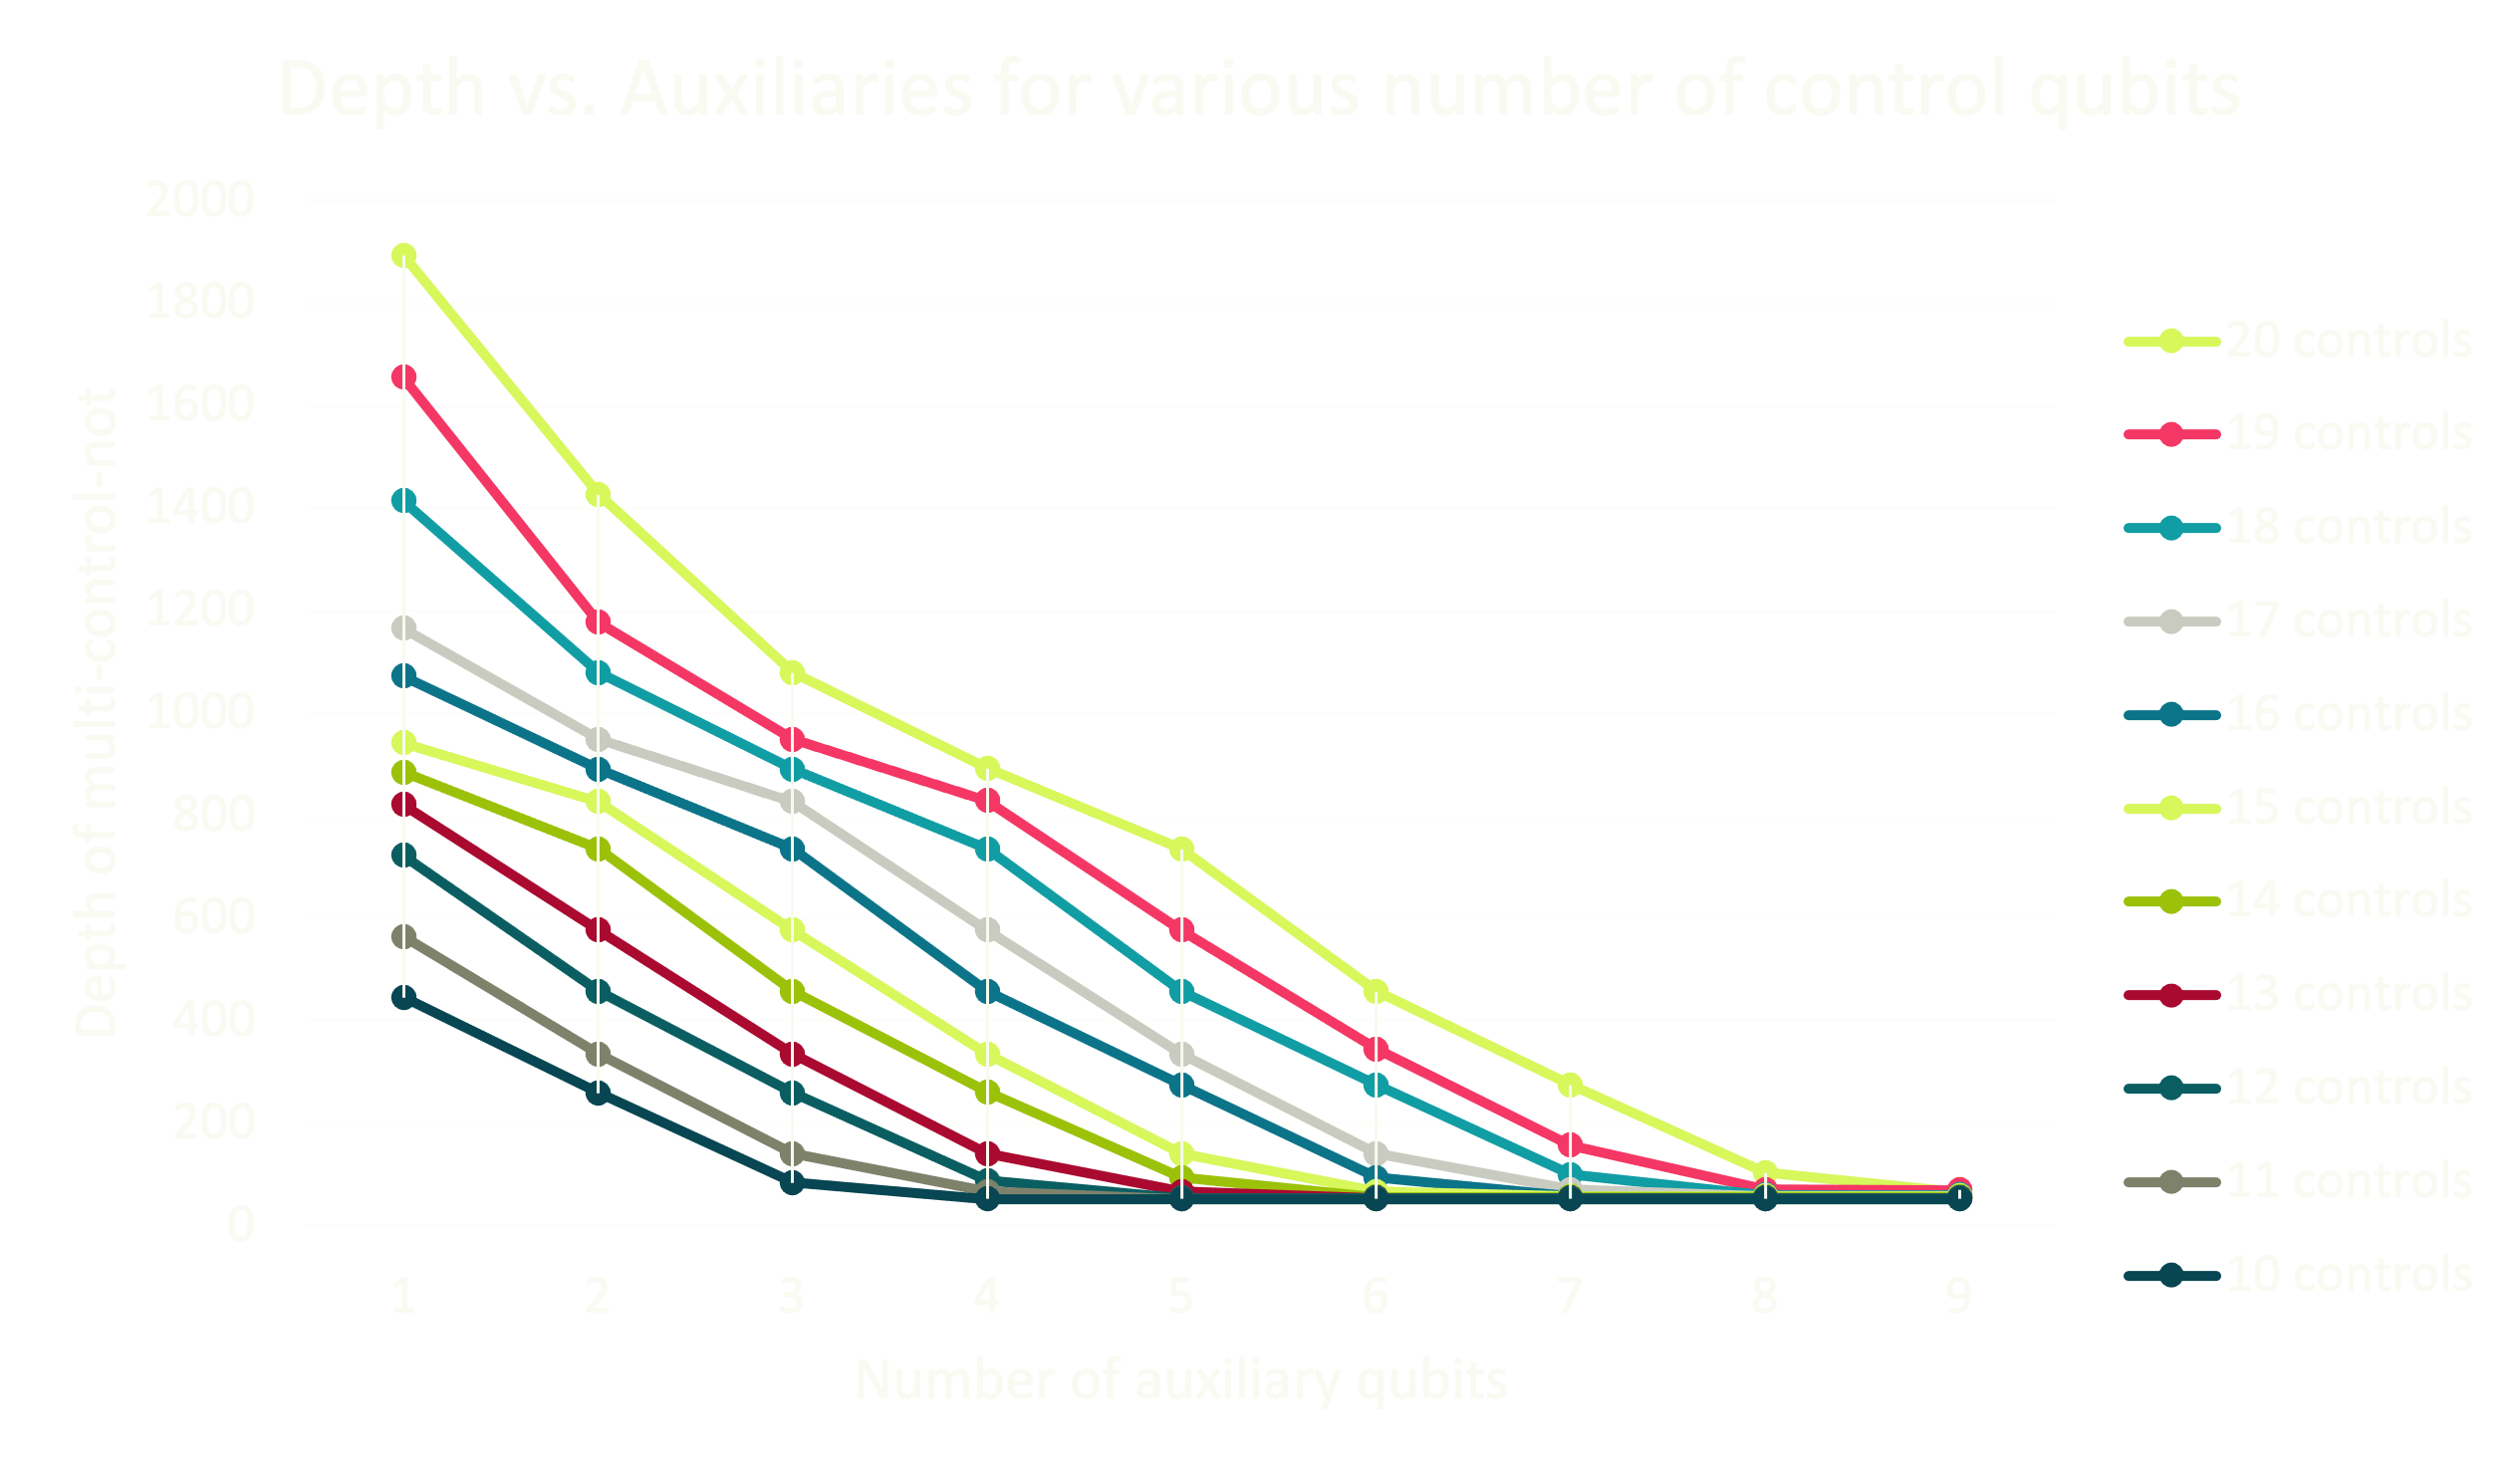